In [1]:
from brian2 import *
prefs.codegen.target = "numpy"

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
start_scope()
#simulation parameters

In [4]:
 duration = 0.25*second

In [5]:
I_off = 0*mV
I_on = 10*mV #*uamp
I_app_start = 20*ms
neuron_type = 'fast spiking'


In [6]:
# параметры a,b,c,d определяют тип нейронов
# -------------------------------------- a b c → d
abcd_neurons = {'regular spiking': [0.02/ms, 0.2, -65*mV, 8*mV],
 'intrinsically bursting':[0.02/ms, 0.2, -55*mV, 4*mV],
 'chattering': [0.02/ms, 0.2, -50*mV, 2*mV],
 'fast spiking': [0.10/ms, 0.2, -65*mV, 2*mV],
 'low-threshold spiking': [0.02/ms, 0.25, -65*mV, 2*mV],
 'thalamo-cortical': [0.02/ms, 0.25, -65*mV, 0.05*mV],
 'resonator': [0.10/ms, 0.25, -65*mV, 8*mV],
 }
a,b,c,d = abcd_neurons[neuron_type]


In [7]:
# Константы модели нейрона
v_th = 30 * mV
C1 = 0.04 * 1/mV
C2 = 5.0
C3 = 140 * mV
C5 = 1.0 #* kohm # сопротивление подаваемому току

In [8]:
eqs = '''
 dv/dt = (C1*(v**2) + C2*v + C3 - u + C5*I_app) / ms: volt
 du/dt = a * ( b * v - u ) : volt
 I_app = I_app_fn(t) : volt
'''


In [9]:
v_0 = c
u_0 = 0 * mV
# %%
# создайте функцию для имитации ступенчатого изменения тока
I_app_fn = TimedArray( [I_off, I_on], dt=I_app_start)


In [10]:
G = NeuronGroup(1, model = eqs , threshold = 'v > v_th' , reset = 'v = c ; u = u + d', method = 'euler' )
G.v = v_0
G.u = u_0


In [11]:
M = StateMonitor(G, variables=['v','I_app','u'], record=True)
SpikeMon = SpikeMonitor(G)
run(duration)


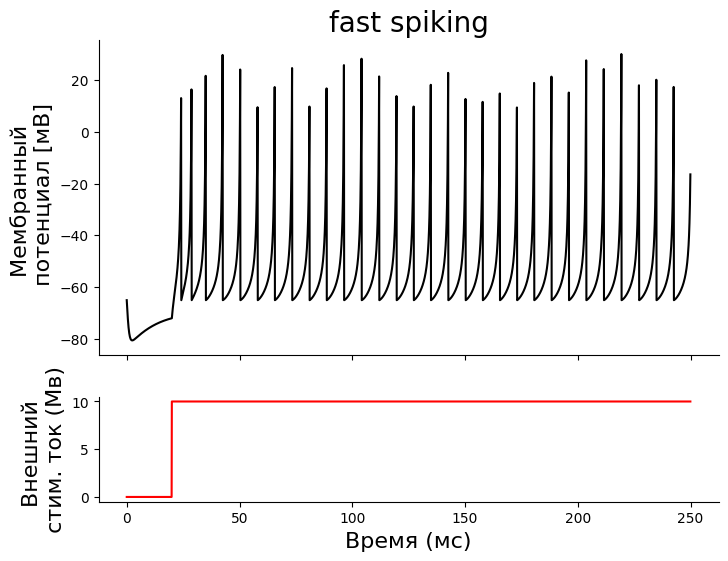

In [12]:
pair = np.ones((2,1))
fake_spike = [-45,60]
f,axs = subplots(2,1,figsize=(8,6), gridspec_kw={'height_ratios': [3, 1]})
axs[0].plot(M.t/ms, M.v[0]/mV,'k') #вывод графика мембранного потенциала
axs[1].plot(M.t/ms, M[0].I_app/mV,'r') # вывод графика подоваемого тока
axs[0].set_ylabel('Мембранный \n потенциал [мВ]',fontsize=16)
axs[0].set_title(neuron_type,fontsize=20)
axs[0].set_xticklabels([])
axs[1].set_ylabel('Внешний \n стим. ток (Мв) ',fontsize=16)
axs[1].set_xlabel('Время (мс)',fontsize=16)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
plt.savefig(f'izhi_{neuron_type}.png')